# <font color=green>Thanks a Ton!! For Trusting me </font>
## Let's Begin our Journey

## Breif Description about dataset
1.  Dataset : Student Performance Data Set
- Source : Kaggle
- Reason : <font color=green>I'm currently a student :)</font>
- Link : [Click here](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/download). In case if hyperlink isnt redirecting kindly download at 'https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/download'
- Breif Description - This dataset contains the student achievements in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por)
- Description about fields : [Click here](https://archive.ics.uci.edu/ml/datasets/Student+Performance).In case if hyperlink isnt redirecting kindly look at 'https://archive.ics.uci.edu/ml/datasets/Student+Performance'
   
# Plan

1. Import required Headers
2. Importing Data
3. Data Check and Data Cleaning
    1. Initial Observations
    1. Verification of datatypes
    2. Hunt For Missing Values
    3. Check for duplicate Observations
    1. Finding Unique values
    2. Feature Encoding
4.  Exploratory Data Analysis (Desciptive Stastistics)
    1. Describe method
    3. Data Visualization using Box Plot
    4. Data Visualization using Scatter Plots
    5. Data Visualization using Pair Plots
    6. Data Visualization using Heat Maps
5. Hypothesis Testing with Correlation stats
    1. Having Internet results in Good grades
    2. Study for more time for Good Grades
    3. Being romantic results in Good Grades
6. Conclusion of Data Analysis

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>


## 1. Headers

In [1]:
# Scientific Computing Libraries
import pandas as pd
import numpy as np

# Viusalization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Stats Libraries
import scipy.stats as stats 
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

### Versions of Imported Libraries
1. pandas = 1.4.0
2. numpy = 1.19.5
3. seaborn = 0.11.2
4. matplotlib = 3.5.2
5. statsmodel = 0.13.2
6. scipy = 1.8.0

## 2. Importing Dataset
We are using Student Peformance Dataset called 'student-por' dataset from kaggale at [link](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/download)

In [2]:
df = pd.read_csv('./Dataset/student-por.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 3. Data check and Cleaning

### 3A & 3B. Initial Observations and Verification of datatypes

In [3]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns),"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 649
Number of Features = 33
Columns : ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 

Datatypes
---------
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64

### <font color=green>✓ The datatypes are assigned properly</font>
1. object - corresponds to string datatype
2. int64  - corresponds to integer datatype

> The columns 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
are binary categorical data('yes' or 'no' type). We will be converting them to binary in the upcoming steps

 ### 3C. Hunt For Missing Values

In [4]:
# Hunt For Missing Values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### <font color=green>✓ There's no missing data in the dataset</font>
#### Incase of missing data, 
1. If its numerical and can be approximated with mean or median of data, we will replace it
2. If its categorical data, most ofthe times we can go with mode.
3. But if the data of an observations is not relatable at all with other observations( Ex: 'Gender') we can drop the row or col,depending on number of missing values


### 3D. Check for duplicate Observations

In [5]:
# Check for duplicate Observations
df.duplicated().sum()

0

### <font color=green>✓ Theres are no duplicate observations</font>
- Having duplicates effects your model results. Hence removing duplicates after confirming every observation is unique is a good method


### 3E. Finding Unique values

In [6]:
# Unique Values Exploration
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

### <font color=#5534A5> This Observations helps us to categorize variables</font>
1. In columns with 2 categorial data
    - They might be binary categorical data ('Yes' or 'no like in 'romantic' colums)
    - They might be with 2 data strings ( Like two school names)
2. In columns with more than 2 categorical data, We can get more useful insigits by Visualizing data

### 3F. Feature Encoding

In [7]:
# Binary Feature Encoding
df[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]] = df[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]].replace({'yes' :1 ,'no':0})
df[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0
3,0,1,0,1,1,1,1,1
4,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
644,0,0,0,1,0,1,1,0
645,0,1,0,0,1,1,1,0
646,0,0,0,1,1,1,0,0
647,0,0,0,0,0,1,1,0


### <font color=green>✓ Binary Feature Encoding is Performed</font>


## 4. Exploratory Data Analysis (Desciptive Stastistics)

### 4A. Describe Method

In [8]:
# Short summary on how our data is
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
# Print Standard Deviations of all Columns
df.describe().iloc[2]

age           1.218138
Medu          1.134552
Fedu          1.099931
traveltime    0.748660
studytime     0.829510
failures      0.593235
schoolsup     0.306502
famsup        0.487381
paid          0.237841
activities    0.500171
nursery       0.398212
higher        0.308481
internet      0.422857
romantic      0.482704
famrel        0.955717
freetime      1.051093
goout         1.175766
Dalc          0.924834
Walc          1.284380
health        1.446259
absences      4.640759
G1            2.745265
G2            2.913639
G3            3.230656
Name: std, dtype: float64

### <font color=green>✓ Describe Method is used and few important observations are noticed</font>
1. Ouliers in absences are noticed. Which means that there are few students who have een absent for very longer period of time when compared to a normal student
2. Least standard deviation is observed in 'paid' followed by 'schoolsup'. This implies that paid and schoolsupport are alomost uniform to all the students

### 4B. Data Visualization using Box Plots
   

/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

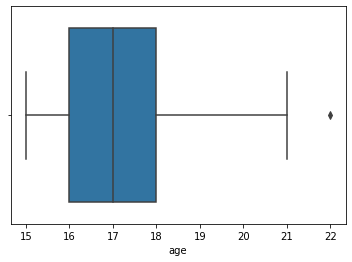

In [10]:
# Barplot for Age Feature
sns.boxplot(df["age"])

### <font color=green>✓ Confimation of outlier in Age using Box Plot</font>


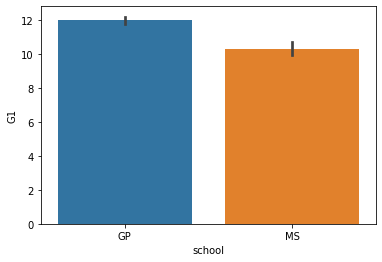

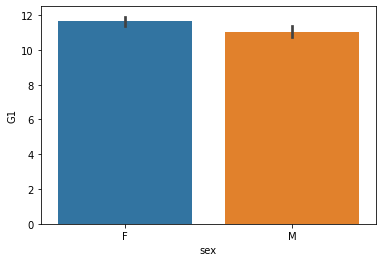

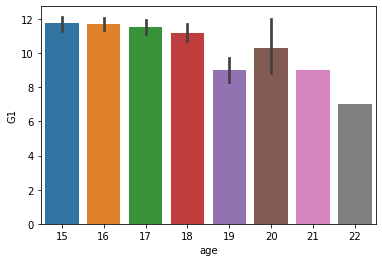

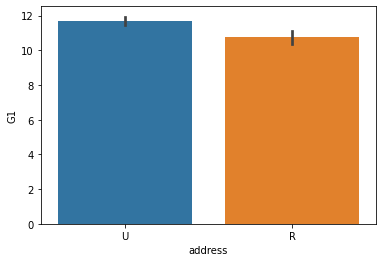

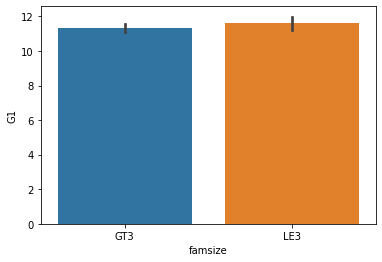

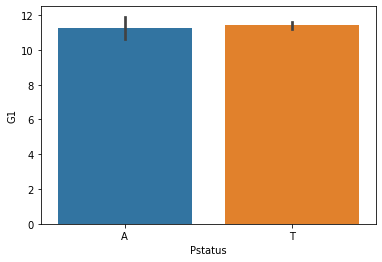

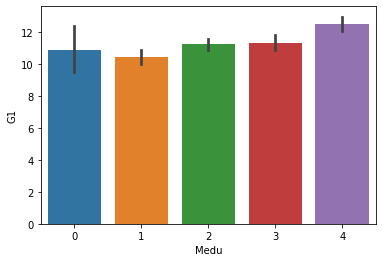

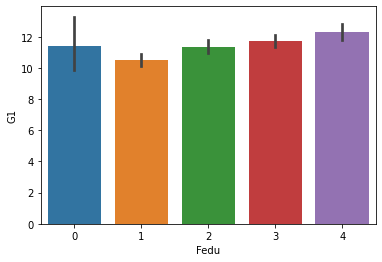

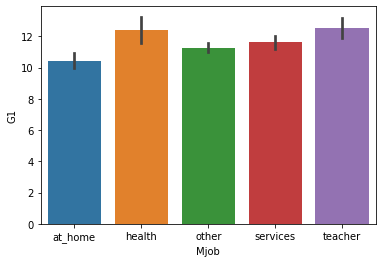

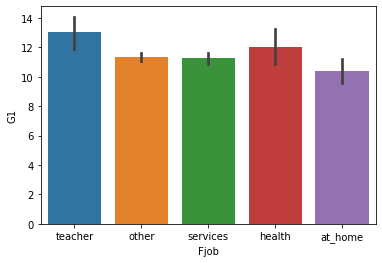

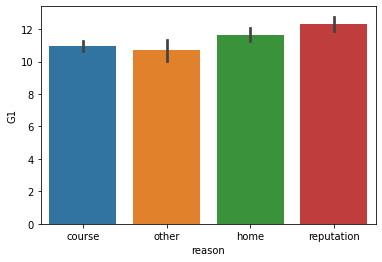

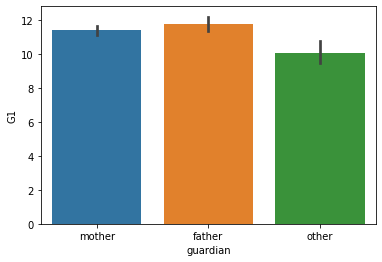

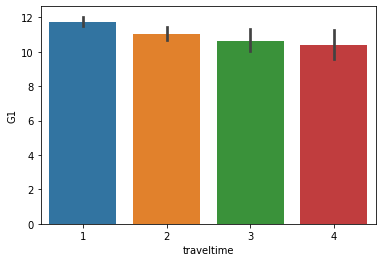

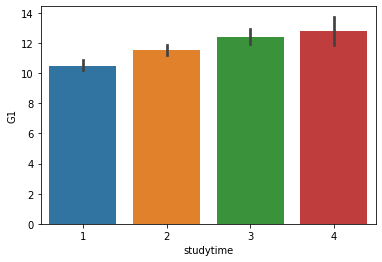

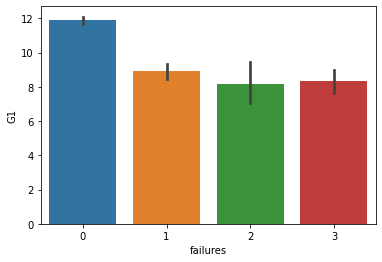

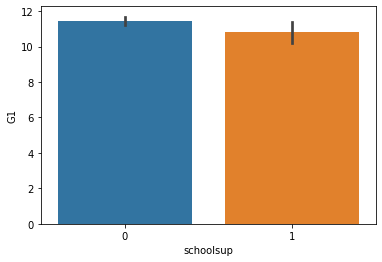

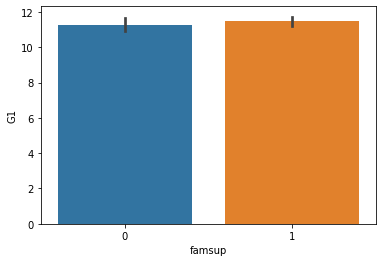

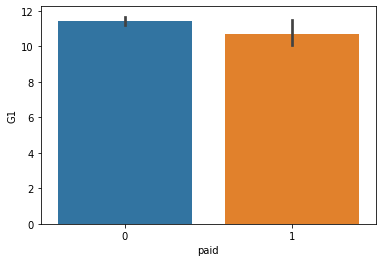

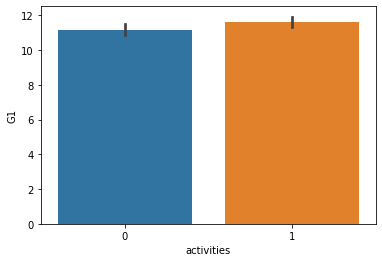

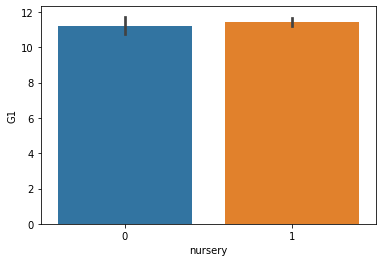

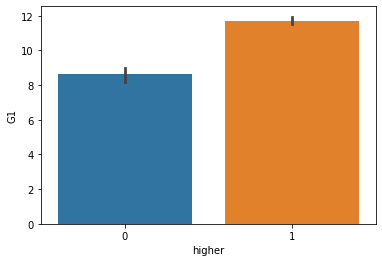

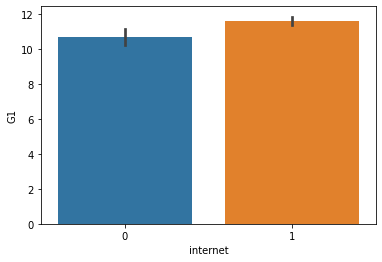

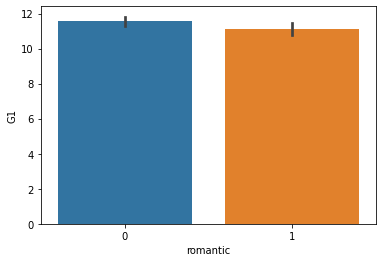

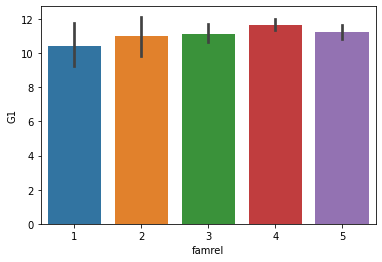

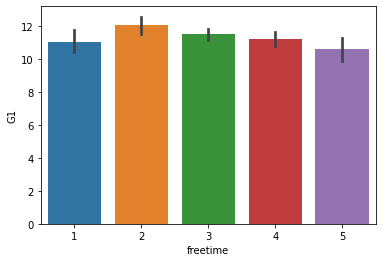

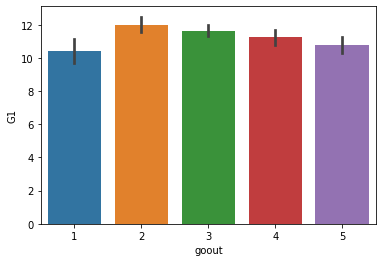

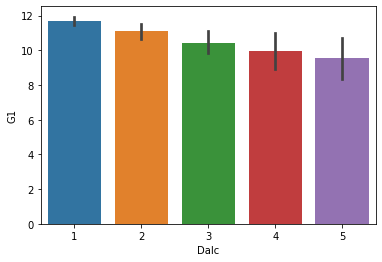

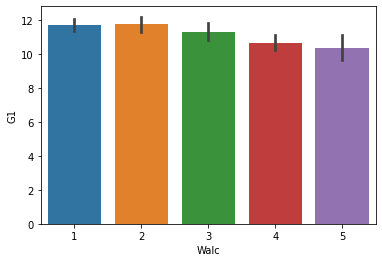

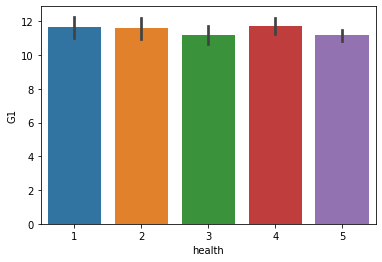

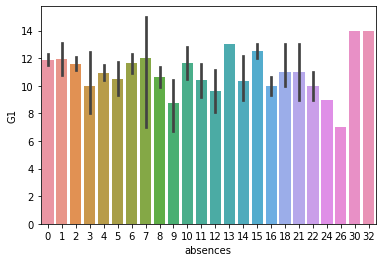

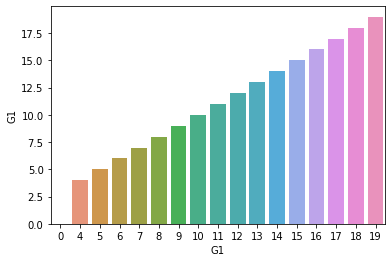

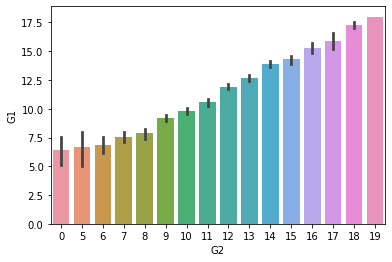

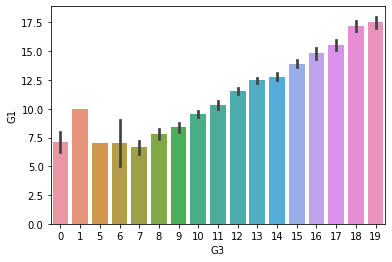

In [11]:
features = df.columns
for i in features:
    plt.figure()
    sns.barplot(x = df[i],y = df["G1"])
    plt.show()

### The Bar plots have been plotted for different features and G1
### <font color=RED>The Bar plots didnt give much of a useful information in the trends of the data</font>
- Incase if theres a seperation of marks achieved or something categorically then we could have inforred something.But theres no shuch pattern. Hence nothing coud be inferred about trends of data


### 4C. Data Visualization using Scatter Plots
   

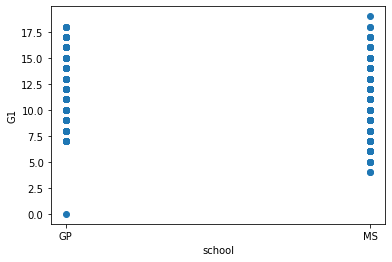

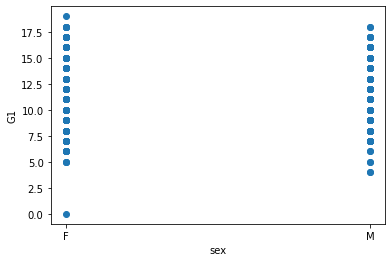

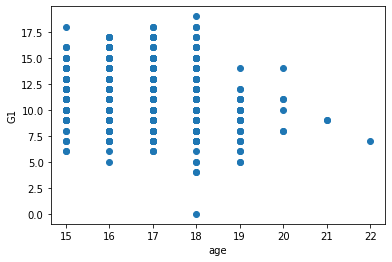

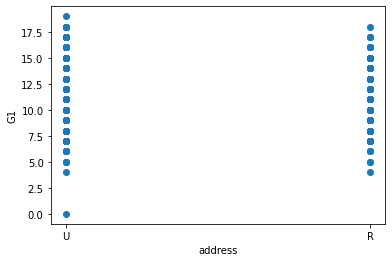

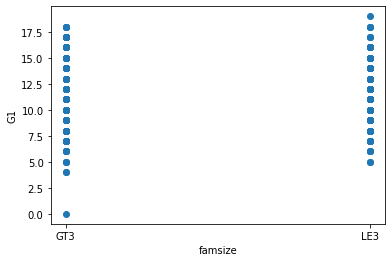

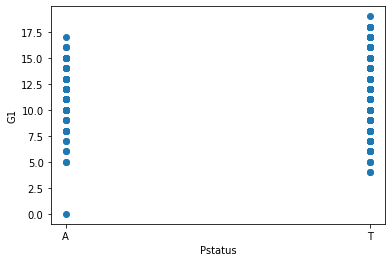

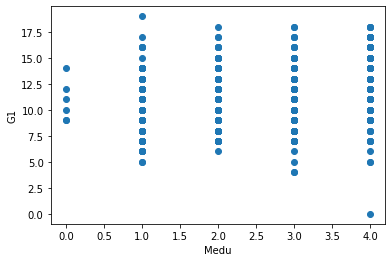

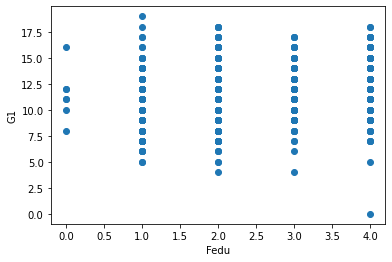

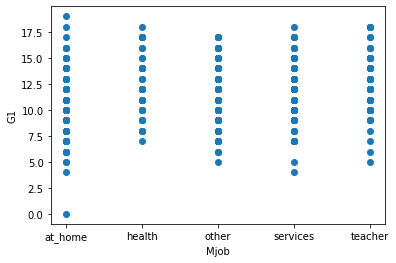

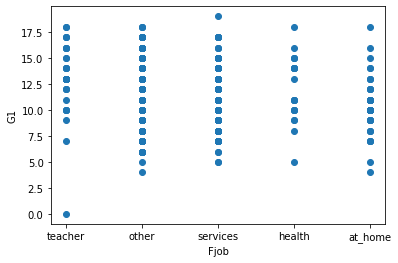

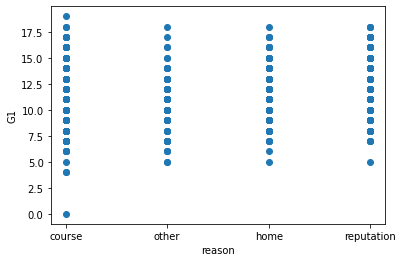

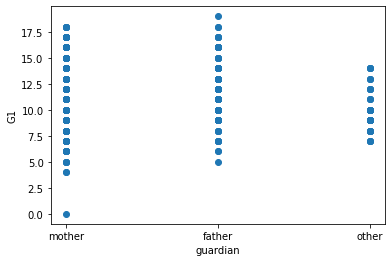

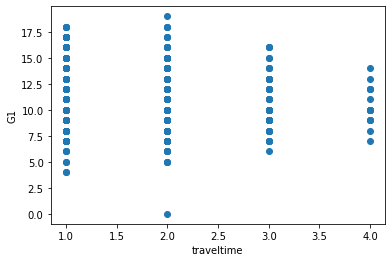

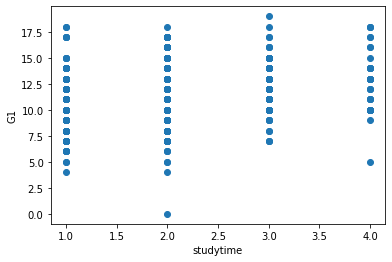

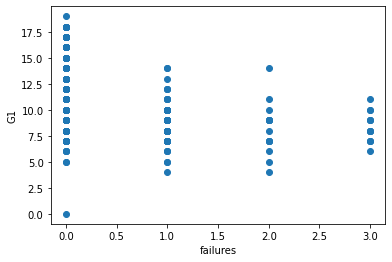

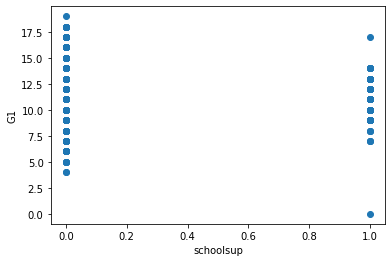

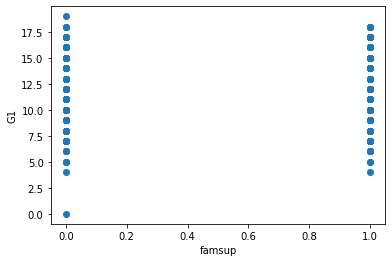

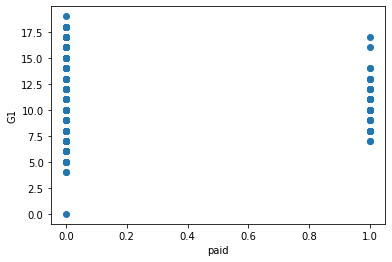

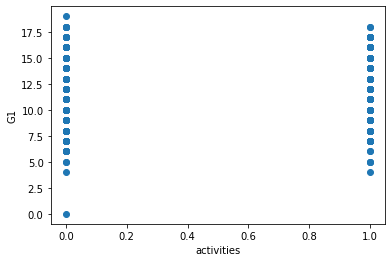

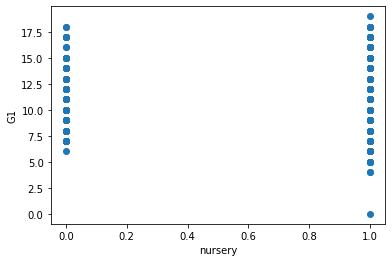

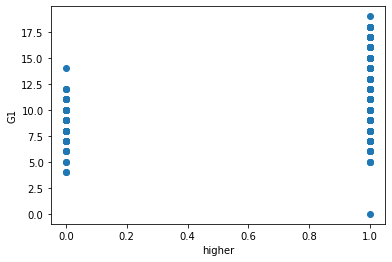

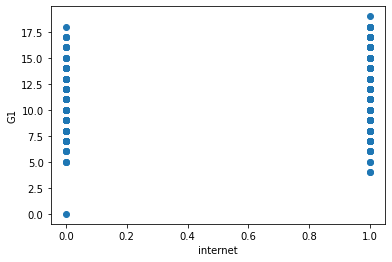

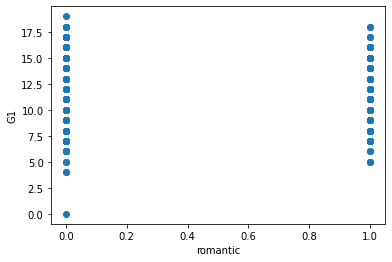

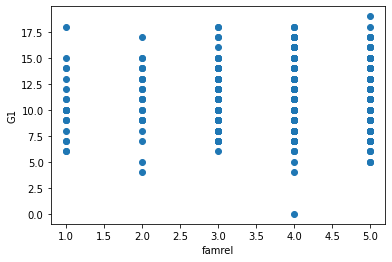

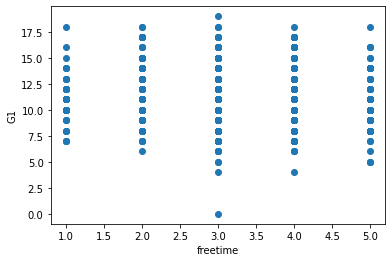

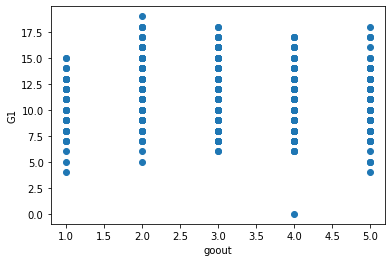

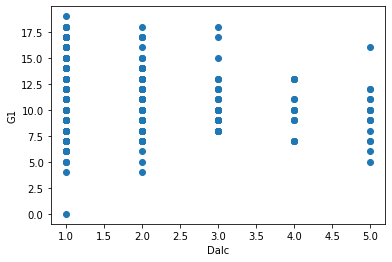

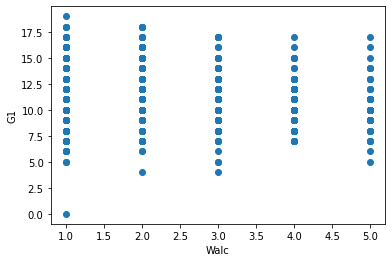

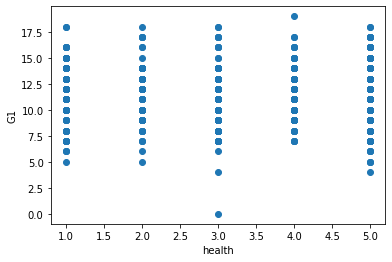

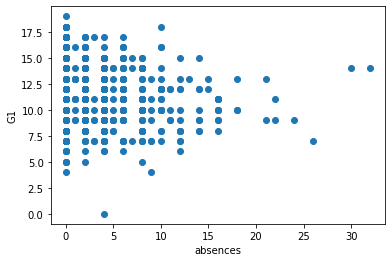

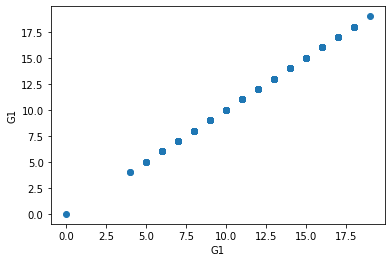

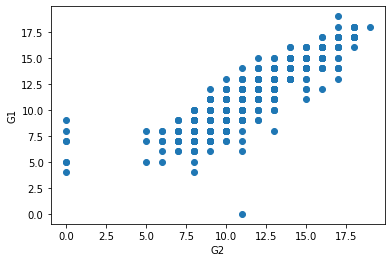

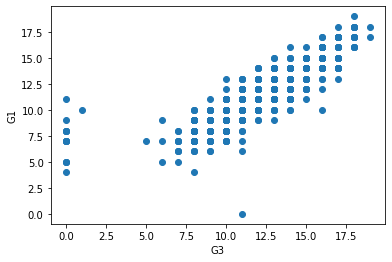

In [12]:
# Scatter plot between absentees and scores in G1
features = df.columns
for i in features:
    plt.figure()
    plt.scatter(df[i],df["G1"])
    plt.xlabel(i)
    plt.ylabel("G1")
    plt.show()

### The Scatter plots have been plotted for different features and G1
### <font color=green>✓ The Scatter plot G1 vs G2 and G1 vs G3 gave a useful insight</font>
- The plot shows almost a linear increase in the maks of G1 for increase in marks of G2 or G3
- Cant tell the causation but ,this might impliy that the person who scores well in G1 is more likely to score well in G2 or G3

### 4D. Data Visualization using Pair Plots
   

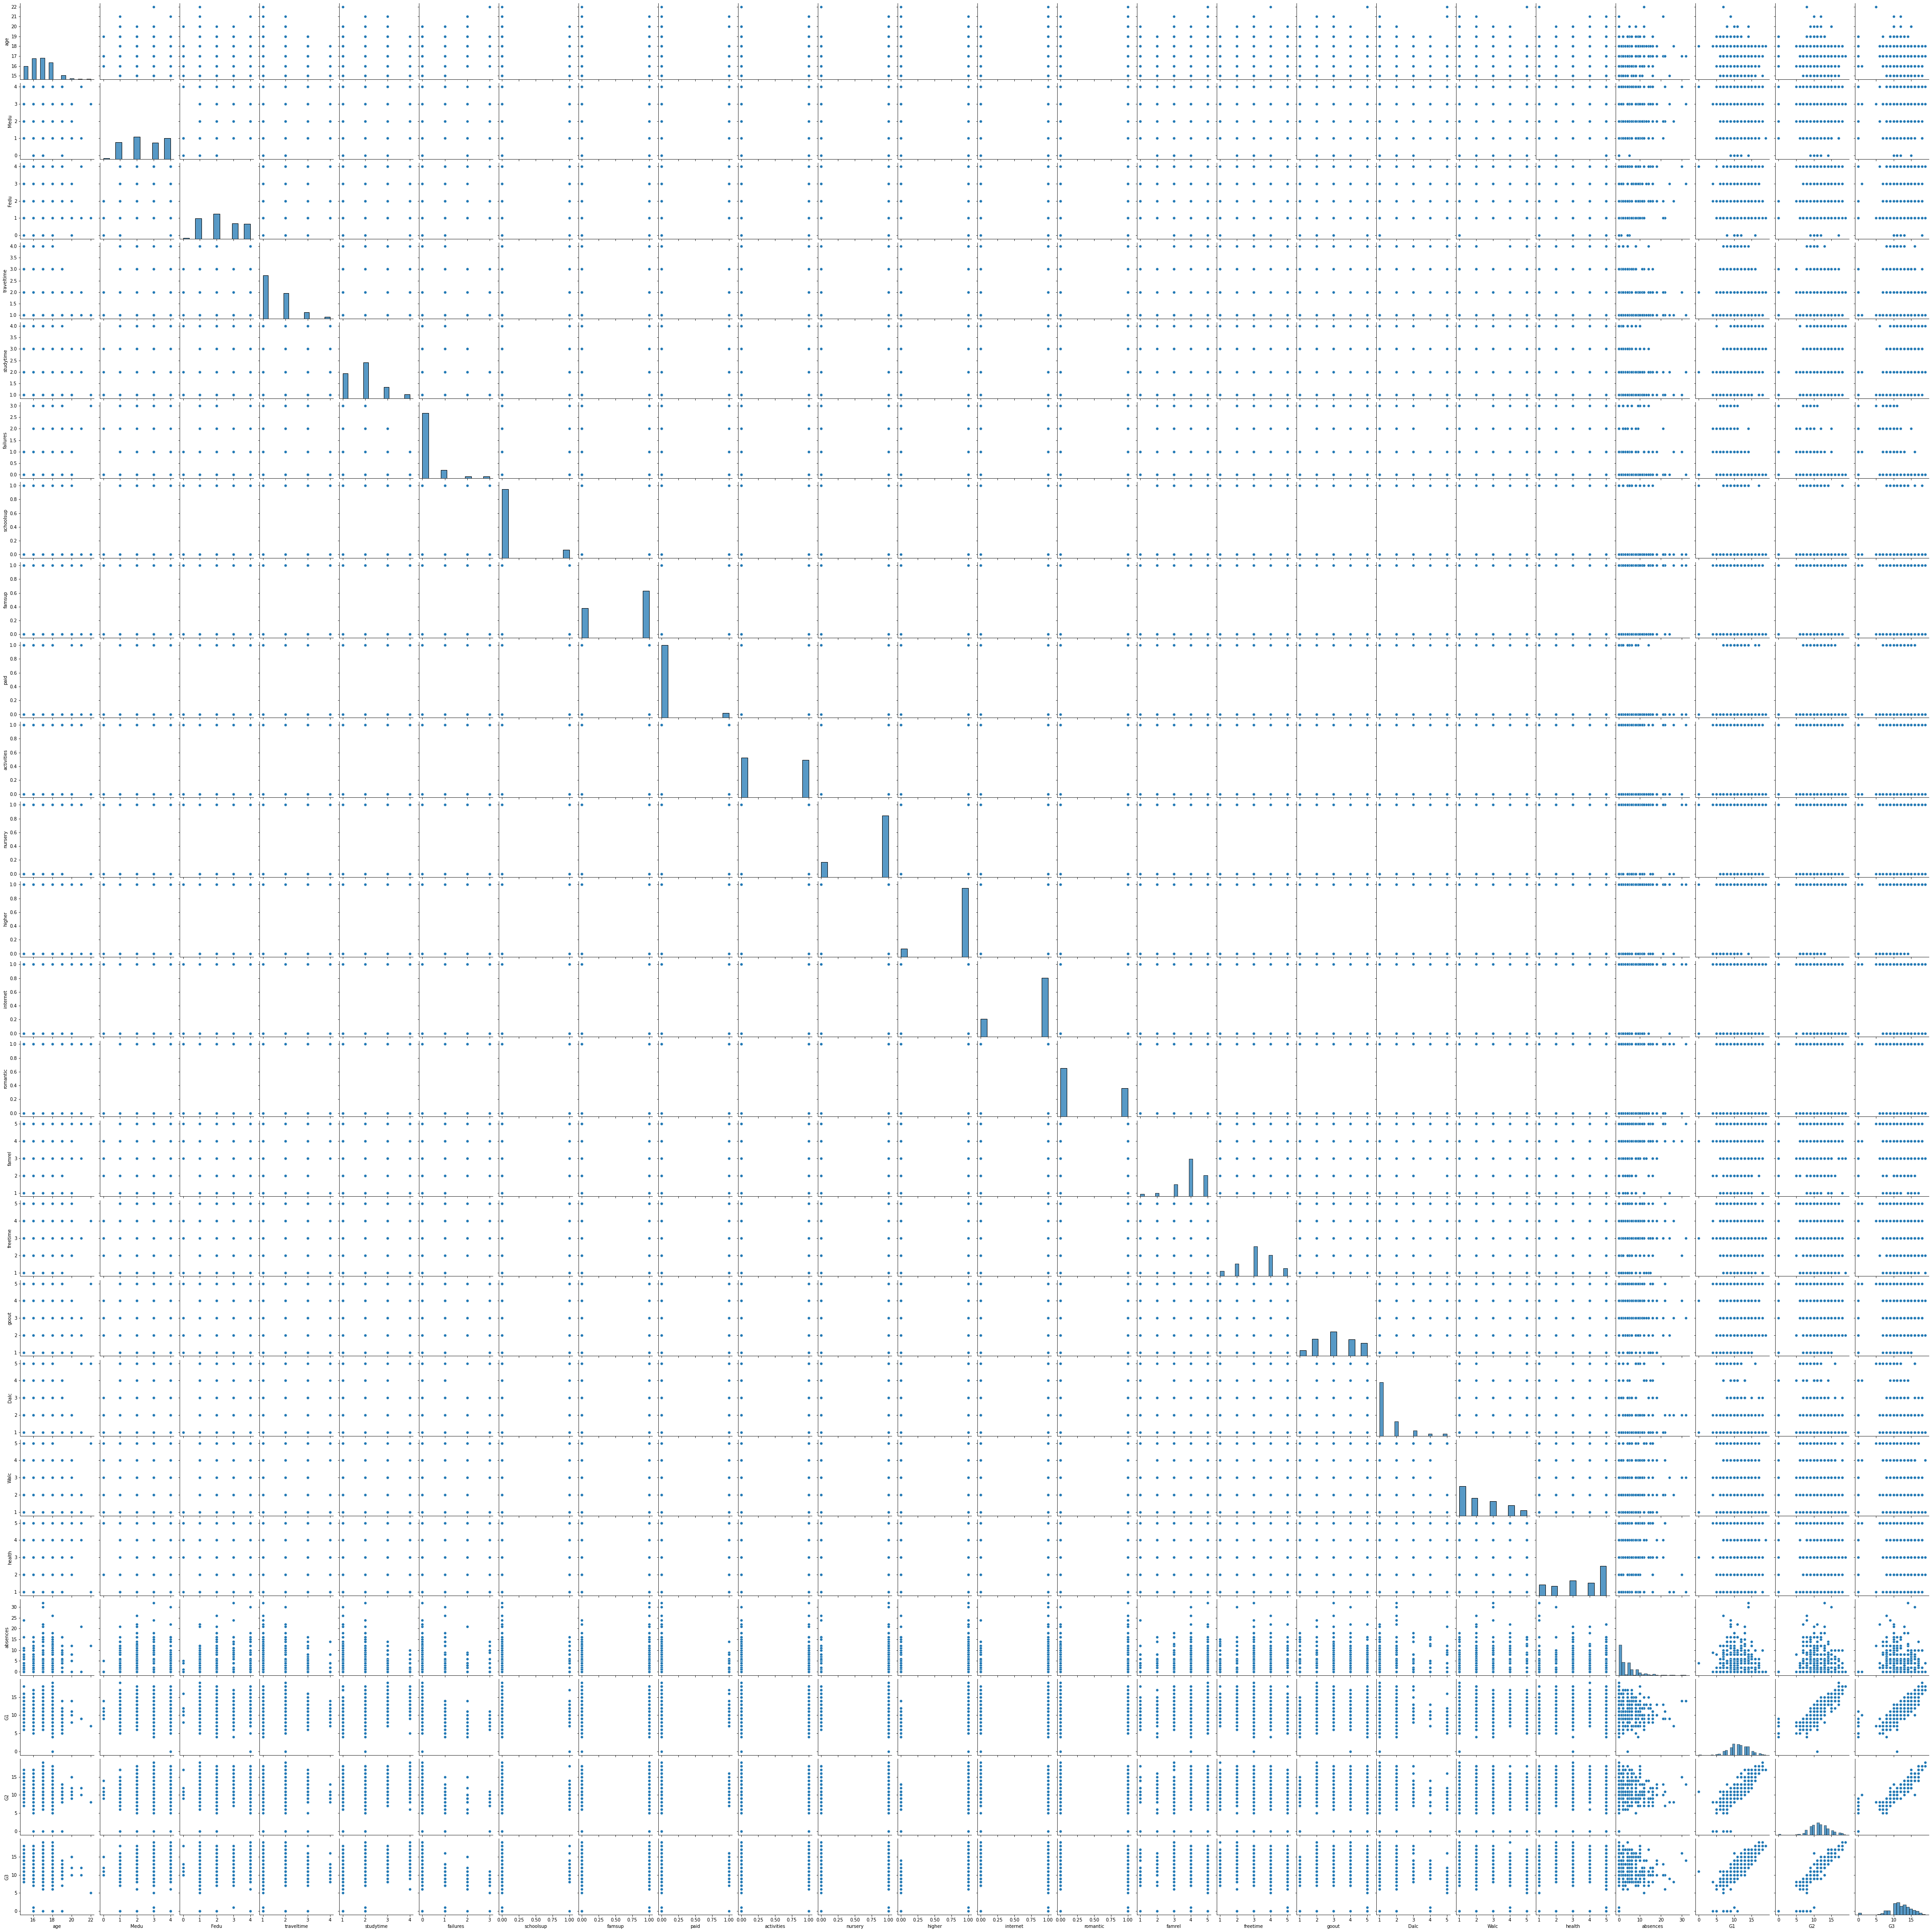

In [13]:
# Pair Plot
sns.pairplot(df)

### <font color=RED>X Not much useful visual information except for the previous observations</font>


### 4E.  Data visualization using Heat Maps
   

Text(0.5, 1.0, 'Correlation Heatmap')

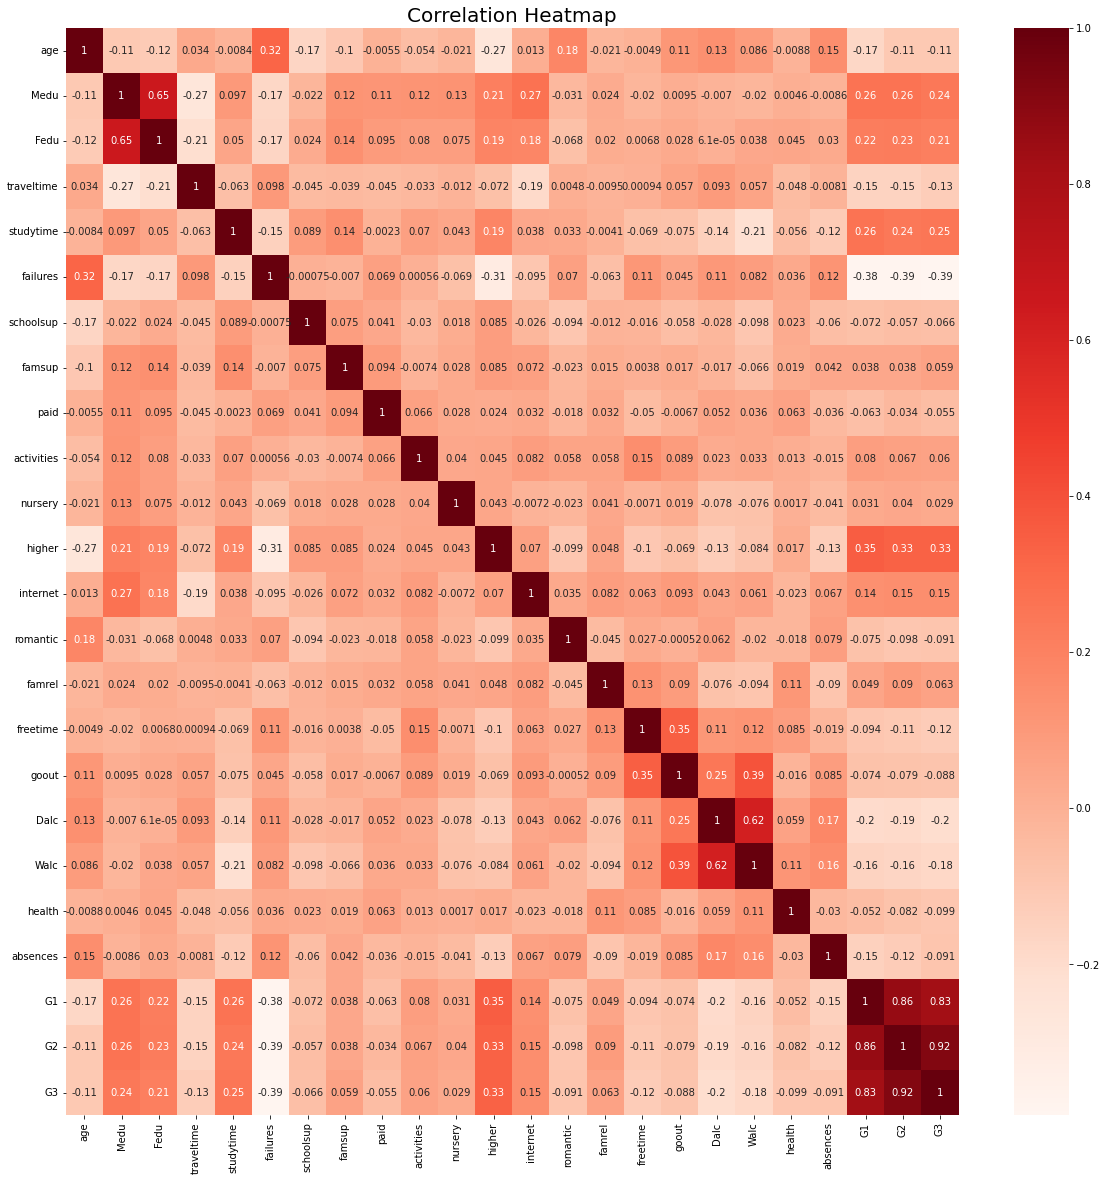

In [14]:
# Heat maps
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

### <font color=green>✓ Few Useful Insights</font>
- G2 and G3 have the highest correlatin factor of 0.92
- G1 and G2, G1 and G3 have a good amount correlation with 0.86 and 0.83
- Medu and Fedu are also co-related with each other with correlation factor of 0.65
- Walc and Dalc are also co-related with each other with correlation factor of 0.62

## 5. Hypothesis


### 5A. Having Internet results in Good grades

In [15]:
internet_students = df.loc[df.internet ==1]
internet_stu_scores = internet_students.G1
internet_stu_mean = internet_stu_scores.mean()
internet_stu_mean

11.610441767068274

In [16]:
non_internet_students = df.loc[df.internet == 0]
non_internet_students_scores = non_internet_students.G1
non_internet_students_mean = non_internet_students_scores.mean()
non_internet_students_mean

10.701986754966887

/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


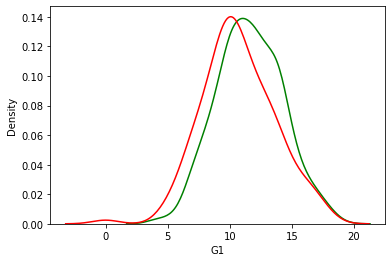

In [17]:
# Lets plot a distribution and infor more
sns.distplot(internet_stu_scores,color='green',hist=False)
sns.distplot(non_internet_students_scores,color='red',hist=False)
plt.show()

# sns.displot(df, x = 'internet', hue='G1',kind="kde",palette=sns.color_palette('coolwarm', as_cmap = True),fill=True,height=5, aspect=1.5)

In [18]:
# Calculating t-value and p-value
alpha=0.05
t_value, p_value = stats.ttest_ind(internet_stu_scores,non_internet_students_scores)
print("t_value = ",t_value, ", p_value = ", p_value)

t_value =  3.5946665162831564 , p_value =  0.0003495181259142716


In [19]:
if p_value <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ". format (p_value,alpha) )
    print("Reject null hypothesis that 'Having Internet results in good grades'.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value,alpha))
    print("Failed to reject null hypothesis that 'Having Intrenet results in good grades'")

Conclusion:Since p_value 0.0003495181259142716 is less than alpha 0.05 
Reject null hypothesis that 'Having Internet results in good grades'.


### <font color=green>Conclusion: Having Internet doesnt result in good grades </font>

### 5B. Study for more time for Good Grades

/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='studytime', ylabel='G1'>

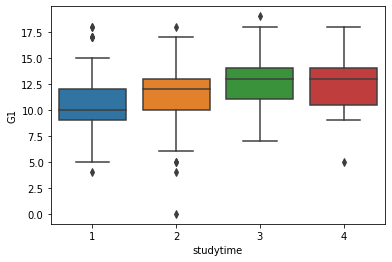

In [20]:
sns.boxplot(df.studytime,df.G1)

Although there are outliers we can see that, studying for more hours results in good scors. Lets find the P value and then conclude 

In [21]:
out_tab = pd.crosstab(index=df.G1, columns=df.studytime)

In [22]:
# chi-square test result -- significant!
alpha = 0.05
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

3.182134456214403e-05

In [23]:
if p_value <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ". format (p_value,alpha) )
    print("Reject null hypothesis that 'Study for more time for Good Grades'.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value,alpha))
    print("Failed to reject null hypothesis that 'Study for more time for Good Grades'")

Conclusion:Since p_value 0.0003495181259142716 is less than alpha 0.05 
Reject null hypothesis that 'Study for more time for Good Grades'.


### <font color=green>Conclusion: Study for more time for good grades </font>

### 5C. Being romantic results in Good Grades

In [24]:
romantic_students = df.loc[df.romantic ==1]
romantic_stu_scores = romantic_students.G1
romantic_stu_mean = romantic_stu_scores.mean()
romantic_stu_mean

11.129707112970712

In [25]:
non_romantic_students = df.loc[df.romantic == 0]
non_romantic_students_scores = non_romantic_students.G1
non_romantic_students_mean = non_romantic_students_scores.mean()
non_romantic_students_mean

11.55609756097561

In [ ]:
# Lets plot a distribution and infor more
sns.distplot(romantic_stu_scores,color='green',hist=False)
sns.distplot(non_romantic_students_scores,color='red',hist=False)
plt.show()

# sns.displot(df, x = 'romantic', hue='G1',kind="kde",palette=sns.color_palette('coolwarm', as_cmap = True),fill=True,height=5, aspect=1.5)

We can see that, the distributions are nearly similar. But little ambigiuos as they arent matching greatly in the middle portions. To have a final verdict, lets calculate p-value and t-value and conclue

In [ ]:
# Calculating t-value and p-value
alpha=0.05
t_value, p_value = stats.ttest_ind(romantic_stu_scores,non_romantic_students_scores)
print("t_value = ",t_value, ", p_value = ", p_value)

In [ ]:
if p_value <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ". format (p_value,alpha) )
    print("Reject null hypothesis that 'Being romantic decreases the grades'.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value,alpha))
    print("Failed to reject null hypothesis that 'Being romantic results in good grades'")

### <font color=green>Conclusion: Being Romantic results in good grades </font>

## 6. Conclusion of Data Analysis
- The dataset is clean without any missing values
- There are no duplicates present in the data
- Few Outliers are observed
- A Strong relationship between G1,G2 and G3 is observed
- Hypothesis Testing
    - Acoording to data
        - Having Internet doesnt result in good grades
        - Study for more time for good grades 
        - Being Romantic results in good grades
        
#### Overally the dataset is good and can be proceeded for further model trainings